In [1]:
import re
import nltk
import shap
import spacy
import transformers
#stopword removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#visualisation
from matplotlib import pyplot as plt
#local imports
from processing import process_data
from sentiment import sentiment_analysis, visualise_sentiments
from processing import process_data_to_list
from frequency_calculation import calculate_frequency_distribution

2024-04-12 11:11:59.828404: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-12 11:11:59.828436: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-12 11:11:59.828442: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-12 11:11:59.828486: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-12 11:11:59.828504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch mo

In [2]:
posts = process_data_to_list("data/posts", "content")
comms = process_data_to_list("data/comments", "body")
data = posts+comms

Processing complete. Total words and comments
Processing complete. Total words and comments


In [3]:
data = data[:100]

<h2> Baseline Sentiment analysis scores </h2>

In [4]:
#this usually takes a while for all posts
scores_baseline = sentiment_analysis(data)

Post 1, sentiment: NEGATIVE, score: 0.99700
Post 2, sentiment: NEGATIVE, score: 0.99888
Post 3, sentiment: NEGATIVE, score: 0.98992
Post 4, sentiment: NEGATIVE, score: 0.99489
Post 5, sentiment: NEGATIVE, score: 0.99867
Post 6, sentiment: NEGATIVE, score: 0.99760
Post 7, sentiment: NEGATIVE, score: 0.97793
Post 8, sentiment: NEGATIVE, score: 0.98703
Post 9, sentiment: POSITIVE, score: 0.99540
Post 10, sentiment: NEGATIVE, score: 0.99825
Post 11, sentiment: POSITIVE, score: 0.96301
Post 12, sentiment: NEGATIVE, score: 0.99916
Post 13, sentiment: POSITIVE, score: 0.99646
Post 14, sentiment: NEGATIVE, score: 0.75171
Post 15, sentiment: NEGATIVE, score: 0.98736
Post 16, sentiment: NEGATIVE, score: 0.98222
Post 17, sentiment: NEGATIVE, score: 0.97155
Post 18, sentiment: POSITIVE, score: 0.99987
Post 19, sentiment: NEGATIVE, score: 0.96528
Post 20, sentiment: NEGATIVE, score: 0.98593
Post 21, sentiment: NEGATIVE, score: 0.86621
Post 22, sentiment: NEGATIVE, score: 0.99892
Post 23, sentiment:

Token indices sequence length is longer than the specified maximum sequence length for this model (757 > 512). Running this sequence through the model will result in indexing errors


Post 60, sentiment: NEGATIVE, score: 0.99973
Post 61, sentiment: NEGATIVE, score: 0.99874
Post 62, sentiment: NEGATIVE, score: 0.99855
Post 63, sentiment: NEGATIVE, score: 0.99916
Post 64, sentiment: NEGATIVE, score: 0.99835
Post 65, sentiment: POSITIVE, score: 0.98131
Post 66, sentiment: POSITIVE, score: 0.99772
Post 67, sentiment: NEGATIVE, score: 0.99756
Post 68, sentiment: NEGATIVE, score: 0.99738
Post 69, sentiment: NEGATIVE, score: 0.99797
Post 70, sentiment: NEGATIVE, score: 0.99188
Post 71, sentiment: NEGATIVE, score: 0.99790
Post 72, sentiment: NEGATIVE, score: 0.99781
Post 73, sentiment: NEGATIVE, score: 0.99424
Post 74, sentiment: NEGATIVE, score: 0.99432
Post 75, sentiment: NEGATIVE, score: 0.99953
Post 76, sentiment: NEGATIVE, score: 0.99824
Post 77, sentiment: NEGATIVE, score: 0.99598
Post 78, sentiment: NEGATIVE, score: 0.99095
Post 79, sentiment: NEGATIVE, score: 0.98106
Post 80, sentiment: NEGATIVE, score: 0.99959
Post 81, sentiment: POSITIVE, score: 0.74812
Post 82, s

In [5]:
#remove stopwords via nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
nltk_output = []

for item in data:
    word_tokens = word_tokenize(item)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    cleaned_sentence = " ".join(filtered_sentence)
    nltk_output.append(cleaned_sentence)

[nltk_data] Downloading package punkt to /Users/ilya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ilya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")
spacy_output = []
for item in data:
    doc = nlp(item)
    filtered_words = [token.text for token in doc if not token.is_stop]
    filtered_sentence = " ".join(filtered_words)
    spacy_output.append(filtered_sentence) 
# Join the filtered words to form a clean text
#clean_text = ' '.join(filtered_words)
 
#print("Text after Stopword Removal:", clean_text)
#print("Original Text:", text)

In [17]:
original_scores = scores_baseline #change this later
nltk_scores = sentiment_analysis(nltk_output)
spacy_scores = sentiment_analysis(spacy_output)

Post 1, sentiment: NEGATIVE, score: 0.99861
Post 2, sentiment: NEGATIVE, score: 0.99900
Post 3, sentiment: NEGATIVE, score: 0.99506
Post 4, sentiment: NEGATIVE, score: 0.99889
Post 5, sentiment: NEGATIVE, score: 0.99703
Post 6, sentiment: NEGATIVE, score: 0.99594
Post 7, sentiment: NEGATIVE, score: 0.96510
Post 8, sentiment: NEGATIVE, score: 0.99551
Post 9, sentiment: POSITIVE, score: 0.96890
Post 10, sentiment: NEGATIVE, score: 0.99560
Post 11, sentiment: NEGATIVE, score: 0.64377
Post 12, sentiment: NEGATIVE, score: 0.99594
Post 13, sentiment: POSITIVE, score: 0.98447
Post 14, sentiment: NEGATIVE, score: 0.99432
Post 15, sentiment: NEGATIVE, score: 0.98265
Post 16, sentiment: NEGATIVE, score: 0.97602
Post 17, sentiment: NEGATIVE, score: 0.96377
Post 18, sentiment: POSITIVE, score: 0.99987
Post 19, sentiment: NEGATIVE, score: 0.98920
Post 20, sentiment: NEGATIVE, score: 0.96263
Post 21, sentiment: NEGATIVE, score: 0.99178
Post 22, sentiment: NEGATIVE, score: 0.99792
Post 23, sentiment:

In [21]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to compute cosine similarity between two lists
def compute_similarity(list1, list2):
    # Ensure the lists are in array form and reshape for cosine_similarity function
    vector1 = np.array(list1).reshape(1, -1)
    vector2 = np.array(list2).reshape(1, -1)
    return cosine_similarity(vector1, vector2)[0][0]

similarity_nltk = compute_similarity(original_scores, nltk_scores)
similarity_spacy = compute_similarity(original_scores, spacy_scores)
print(f"Cosine Similarity with NLTK: {similarity_nltk}")
print(f"Cosine Similarity with spaCy: {similarity_spacy}")

Cosine Similarity with NLTK: 0.6915573378229443
Cosine Similarity with spaCy: 0.6240726695650849


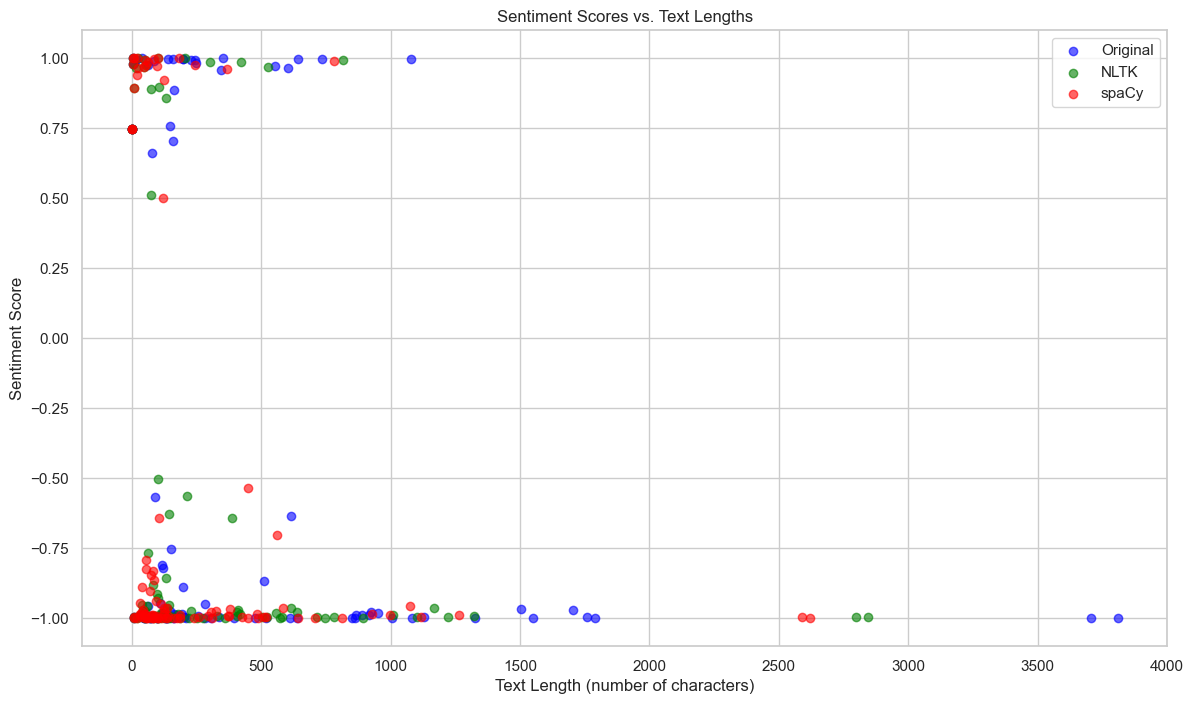

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
original_lengths = [len(text) for text in data]
nltk_lengths = [len(text) for text in nltk_output]
spacy_lengths = [len(text) for text in spacy_output]

sns.set(style="whitegrid", context="notebook")

# Create the scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(original_lengths, original_scores, color='blue', alpha=0.6, label='Original')
plt.scatter(nltk_lengths, nltk_scores, color='green', alpha=0.6, label='NLTK')
plt.scatter(spacy_lengths, spacy_scores, color='red', alpha=0.6, label='spaCy')
plt.title('Sentiment Scores vs. Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

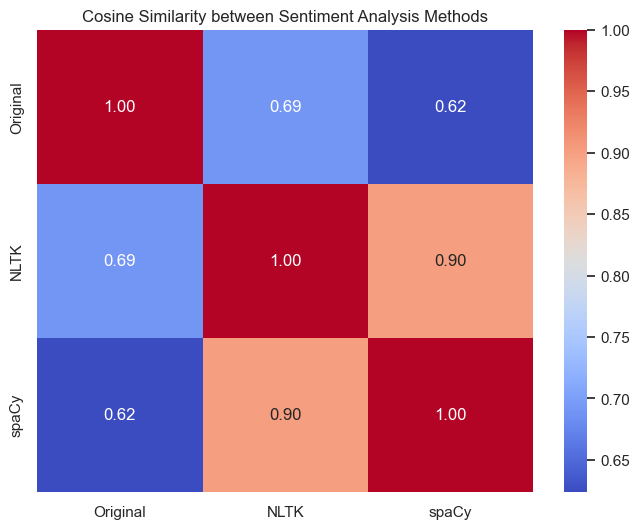

In [25]:
# Calculate similarities
similarity_nltk = compute_similarity(original_scores, nltk_scores)
similarity_spacy = compute_similarity(original_scores, spacy_scores)
similarity_nltk_spacy = compute_similarity(nltk_scores, spacy_scores)

# Prepare the similarity matrix
similarity_matrix = np.array([
    [1, similarity_nltk, similarity_spacy],          # Similarity with original
    [similarity_nltk, 1, similarity_nltk_spacy],     # Similarity between nltk and others
    [similarity_spacy, similarity_nltk_spacy, 1]     # Similarity between spacy and others
])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Original', 'NLTK', 'spaCy'],
            yticklabels=['Original', 'NLTK', 'spaCy'])
plt.title('Cosine Similarity between Sentiment Analysis Methods')
plt.show()